# Midterm Project CS675 Scaleable Database


 
### Analyzing New York City Data utilizing SQL, Python, and Version Control


## Project Overview

**The main goal of this project is to analyze three NYPD datasets to gain insights about public safety in New York City. Data Science tools such Python, SQL, and Git to clean, retrieve, and analyze data on the following dataset**




**Project Goal**: - The end goal is to uncover patterns and trends that can help law enforcement and policymakers make data-driven decisions and keep New York City residence safety and reduce the crime

#### Data Sets use for this project __(https://catalog.data.gov/dataset)__

1. NYPD Hatecrime
2. NYPD Shooting
3. NYPD Arrest


#### Procedures

1. Import the necessary Libraries
2. Read in an view all three data set
3. Clean and Transform Data set using Pandas and numpy libraries
3. Data Exploration using Matplotlib and Seaborn libraries
4. Conclusion
5. Limitation and Recomemdation


### Team Members: Nuzhut Prova, Ramaya and Sunita Inderjit, Srikant Reddy





#  NYPD Hate Crime Dataset

#### Business Questions.

1. Borough with most Hatecrime
2. Top Bias Motivation
3. Crime over time



In [1]:
#Import that necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb



In [2]:
hate_crime = pd.read_csv("NYPD_Hate_Crimes.csv")
hate_crime.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,201904612204817,2019,2,02/08/2019,46,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,02/08/2019,B31678218
1,201904812229517,2019,3,03/09/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682790
2,201904812231317,2019,3,03/10/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682806
3,201904812226617,2019,3,03/08/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,03/09/2019,B31682806
4,201904212405517,2019,5,05/11/2019,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-MUSLIM,Religion/Religious Practice,05/10/2019,B31692174


# Data Preparation

In [4]:
#shape of data

hate_crime.shape

(2247, 14)

In [5]:
#get data type
hate_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Full Complaint ID              2247 non-null   int64 
 1   Complaint Year Number          2247 non-null   int64 
 2   Month Number                   2247 non-null   int64 
 3   Record Create Date             2247 non-null   object
 4   Complaint Precinct Code        2247 non-null   int64 
 5   Patrol Borough Name            2247 non-null   object
 6   County                         2247 non-null   object
 7   Law Code Category Description  2247 non-null   object
 8   Offense Description            2247 non-null   object
 9   PD Code Description            2247 non-null   object
 10  Bias Motive Description        2247 non-null   object
 11  Offense Category               2247 non-null   object
 12  Arrest Date                    903 non-null    object
 13  Arr

In [6]:
# decribe
hate_crime.describe()

,Full Complaint ID,Complaint Year Number,Month Number,Complaint Precinct Code
count,2.247000e+03,2247.000000,2247.000000,2247.000000
mean,2.021075e+14,2021.014686,5.950156,59.902092
std,1.306237e+11,1.305259,3.284819,38.009633
min,2.019001e+14,2019.000000,1.000000,1.000000
25%,2.020060e+14,2020.000000,3.000000,19.000000
50%,2.021077e+14,2021.000000,6.000000,66.000000
75%,2.022070e+14,2022.000000,9.000000,90.000000
max,2.023122e+14,2023.000000,12.000000,123.000000


In [7]:
hate_crime.corr()

,Full Complaint ID,Complaint Year Number,Month Number,Complaint Precinct Code
Full Complaint ID,1.000000,0.999577,-0.198125,0.040274
Complaint Year Number,0.999577,1.000000,-0.198898,0.011184
Month Number,-0.198125,-0.198898,1.000000,0.021418
Complaint Precinct Code,0.040274,0.011184,0.021418,1.000000


In [8]:

hate_crime.isnull().sum()


Full Complaint ID                   0
Complaint Year Number               0
Month Number                        0
Record Create Date                  0
Complaint Precinct Code             0
Patrol Borough Name                 0
County                              0
Law Code Category Description       0
Offense Description                 0
PD Code Description                 0
Bias Motive Description             0
Offense Category                    0
Arrest Date                      1344
Arrest Id                        1344
dtype: int64

In [9]:

hate_crime.duplicated().sum()

0

In [10]:
hate_crime.columns

Index(['Full Complaint ID', 'Complaint Year Number', 'Month Number',
       'Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name',
       'County', 'Law Code Category Description', 'Offense Description',
       'PD Code Description', 'Bias Motive Description', 'Offense Category',
       'Arrest Date', 'Arrest Id'],
      dtype='object')

# Data Cleaning

In [11]:
# Convert 'Record Create Date' and 'Arrest Date' to datetime format

hate_crime['Record Create Date'] = pd.to_datetime(hate_crime['Record Create Date'], errors='coerce')
hate_crime['Arrest Date'] = pd.to_datetime(hate_crime['Arrest Date'], errors='coerce')

# Check the data types of all columns to confirm changes

hate_crime.dtypes

Full Complaint ID                         int64
Complaint Year Number                     int64
Month Number                              int64
Record Create Date               datetime64[ns]
Complaint Precinct Code                   int64
Patrol Borough Name                      object
County                                   object
Law Code Category Description            object
Offense Description                      object
PD Code Description                      object
Bias Motive Description                  object
Offense Category                         object
Arrest Date                      datetime64[ns]
Arrest Id                                object
dtype: object

In [12]:
# Impute missing values in 'Arrest Date' and 'Arrest Id' with '0'

hate_crime['Arrest Date'].fillna(0,inplace=True)
hate_crime['Arrest Id'].fillna(0, inplace=True)
hate_crime.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,201904612204817,2019,2,2019-02-08,46,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,2019-02-08 00:00:00,B31678218
1,201904812229517,2019,3,2019-03-09,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,2019-03-09 00:00:00,B31682790
2,201904812231317,2019,3,2019-03-10,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,2019-03-09 00:00:00,B31682806
3,201904812226617,2019,3,2019-03-08,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,2019-03-09 00:00:00,B31682806
4,201904212405517,2019,5,2019-05-11,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-MUSLIM,Religion/Religious Practice,2019-05-10 00:00:00,B31692174


# Data Exploration

## Q1.  County with the Highest Hate Crime

In [13]:
hate_crime['County'].value_counts()

NEW YORK    797
KINGS       777
QUEENS      426
BRONX       163
RICHMOND     84
Name: County, dtype: int64

In [14]:
hate_crime['Offense Category'].value_counts()

Religion/Religious Practice           1110
Race/Color                             586
Sexual Orientation                     319
Ethnicity/National Origin/Ancestry     146
Gender                                  82
Race/Religious Practice                  2
Age                                      1
Disability                               1
Name: Offense Category, dtype: int64

In [15]:
hate_crime['PD Code Description'].describe()

count                        2247
unique                         69
top       AGGRAVATED HARASSMENT 1
freq                          532
Name: PD Code Description, dtype: object

In [16]:
hate_crime['Law Code Category Description'].value_counts()

MISDEMEANOR      1153
FELONY           1075
VIOLATION          17
INVESTIGATION       2
Name: Law Code Category Description, dtype: int64

# Q2. Top Bias Motivate

In [17]:
hate_crime['Bias Motive Description'].value_counts()

ANTI-JEWISH                          983
ANTI-ASIAN                           299
ANTI-MALE HOMOSEXUAL (GAY)           276
ANTI-BLACK                           195
ANTI-WHITE                            88
ANTI-OTHER ETHNICITY                  88
ANTI-MUSLIM                           60
ANTI-TRANSGENDER                      60
ANTI-HISPANIC                         51
ANTI-CATHOLIC                         42
ANTI-FEMALE HOMOSEXUAL (LESBIAN)      32
ANTI-FEMALE                           14
ANTI-LGBT (MIXED GROUP)               11
ANTI-GENDER NON-CONFORMING             8
ANTI-ARAB                              7
ANTI-HINDU                             6
ANTI-OTHER RELIGION                    5
ANTI-SIKH                              4
ANTI-MULTI-RACIAL GROUPS               3
ANTI-JEHOVAHS WITNESS                  3
ANTI-BUDDHIST                          3
ANTI-RELIGIOUS PRACTICE GENERALLY      3
ANTI-EASTERN ORTHODOX                  2
60 YRS AND OLDER                       1
ANTI-PHYSICAL DI

In [18]:
hate_crime['Offense Description'].value_counts()

MISCELLANEOUS PENAL LAW           558
CRIMINAL MISCHIEF & RELATED OF    495
ASSAULT 3 & RELATED OFFENSES      435
OFF. AGNST PUB ORD SENSBLTY &     318
FELONY ASSAULT                    278
ROBBERY                            66
GRAND LARCENY                      32
HARRASSMENT 2                      17
BURGLARY                            9
SEX CRIMES                          9
PETIT LARCENY                       7
MURDER & NON-NEGL. MANSLAUGHTE      5
DANGEROUS WEAPONS                   4
OFFENSES AGAINST THE PERSON         3
CRIMINAL TRESPASS                   2
ARSON                               2
INVESTIGATIONS/COMPLAINTS ONLY      2
RAPE                                1
KIDNAPPING & RELATED OFFENSES       1
DANGEROUS DRUGS                     1
OFFENSES AGAINST PUBLIC ADMINI      1
FRAUDS                              1
Name: Offense Description, dtype: int64

In [19]:
hate_crime.groupby(['County'])

In [20]:
county_group_grp = hate_crime.groupby(['County'])

In [21]:
county_group_grp['Offense Category'].value_counts()

County    Offense Category                  
BRONX     Religion/Religious Practice            77
          Race/Color                             38
          Sexual Orientation                     28
          Gender                                 12
          Ethnicity/National Origin/Ancestry      8
KINGS     Religion/Religious Practice           461
          Race/Color                            136
          Sexual Orientation                     87
          Ethnicity/National Origin/Ancestry     64
          Gender                                 29
NEW YORK  Religion/Religious Practice           330
          Race/Color                            268
          Sexual Orientation                    145
          Ethnicity/National Origin/Ancestry     32
          Gender                                 19
          Race/Religious Practice                 2
          Disability                              1
QUEENS    Religion/Religious Practice           201
          Race/Colo

In [22]:
county_group_grp['Bias Motive Description'].describe()

,count,unique,top,freq
County,,,,
BRONX,163,13,ANTI-JEWISH,67
KINGS,777,20,ANTI-JEWISH,425
NEW YORK,797,20,ANTI-JEWISH,308
QUEENS,426,20,ANTI-JEWISH,148
RICHMOND,84,8,ANTI-JEWISH,35


# Visualizing the Data

# Q3. Hate Crime overtime

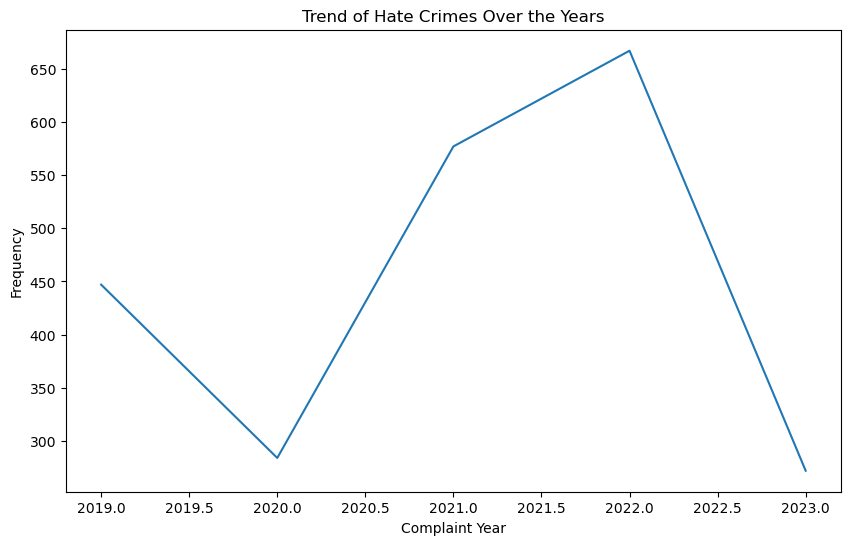

In [23]:
# Time Series Plot: Trend of hate crimes over the years

plt.figure(figsize=(10, 6))
time_series_data = hate_crime.groupby(['Complaint Year Number']).size().reset_index(name='Frequency')
sb.lineplot(x='Complaint Year Number', y='Frequency', data=time_series_data)
plt.title('Trend of Hate Crimes Over the Years')
plt.xlabel('Complaint Year')
plt.ylabel('Frequency')
plt.show()hate

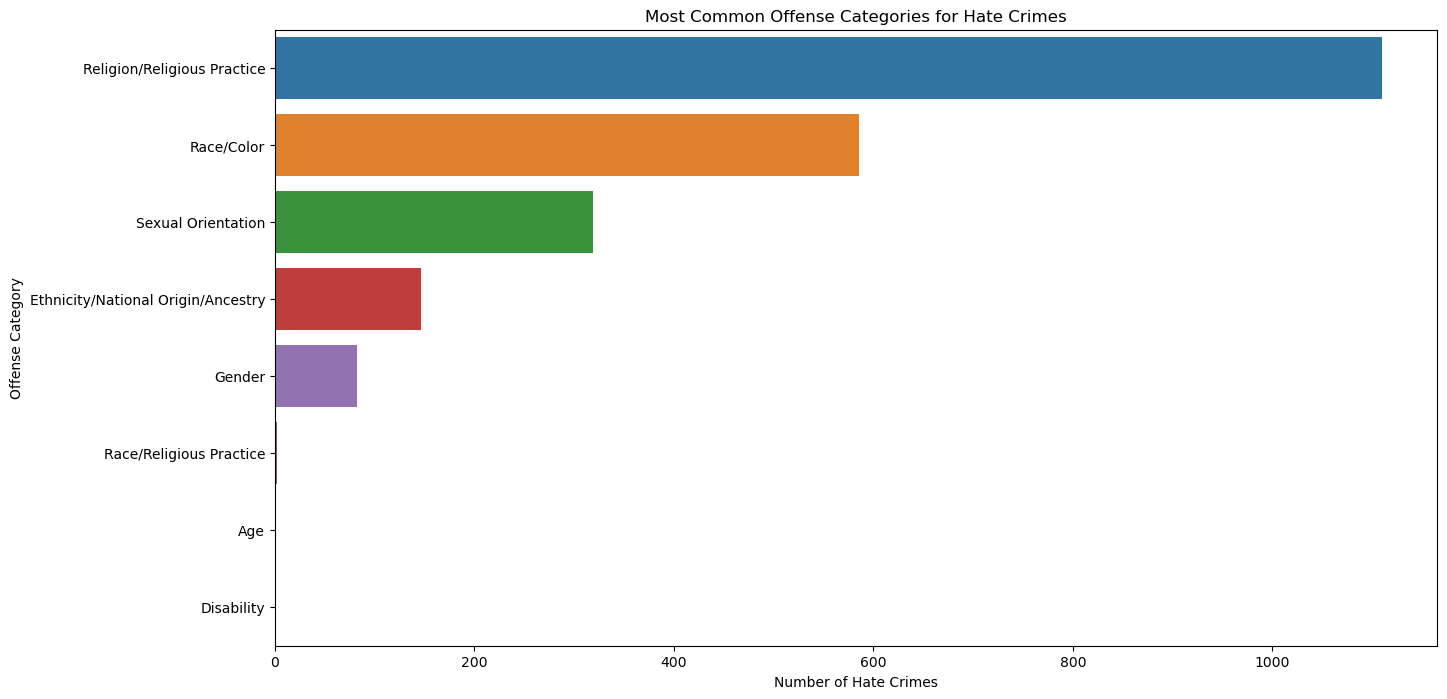

In [24]:
#Plot the most common offense categories
plt.figure(figsize=(15, 8))
sb.countplot(y='Offense Category', data=hate_crime, order = hate_crime['Offense Category'].value_counts().index)
plt.title('Most Common Offense Categories for Hate Crimes')
plt.xlabel('Number of Hate Crimes')
plt.ylabel('Offense Category')
plt.show()

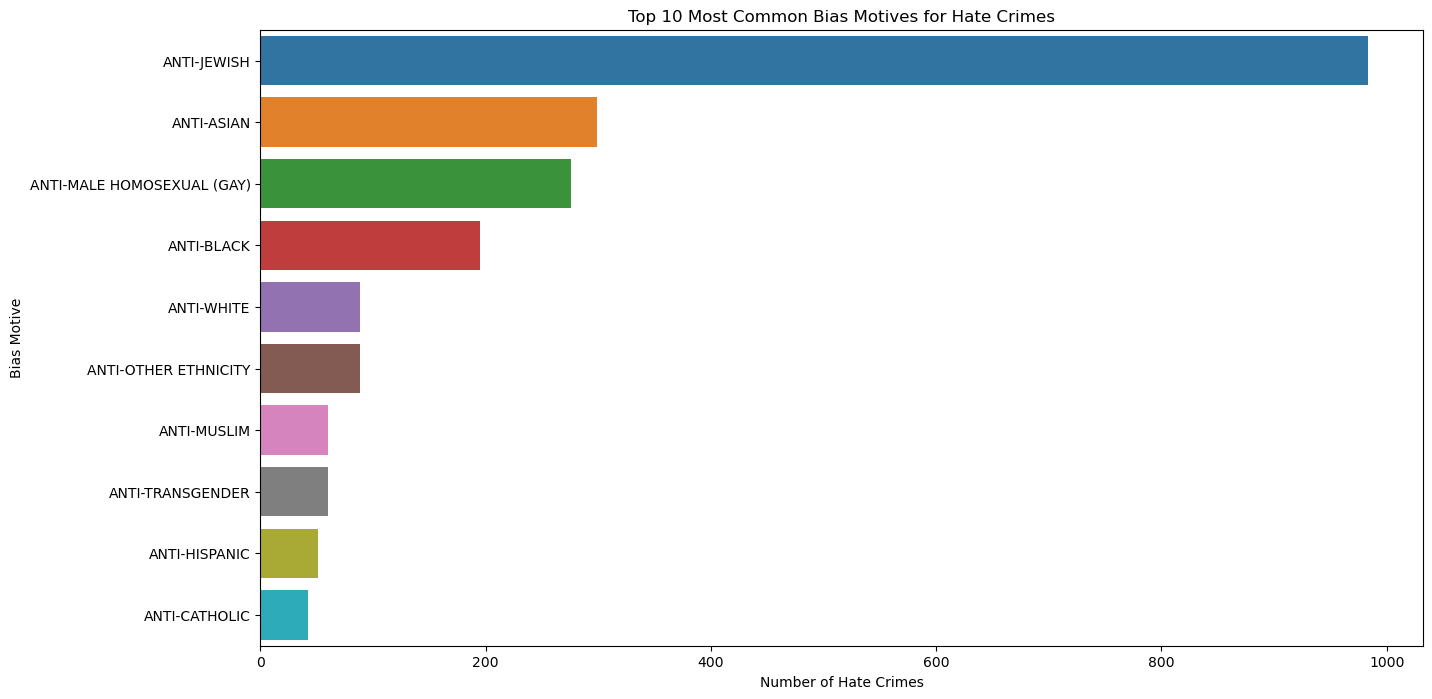

In [25]:
# Plot the top 10 most common bias motives
plt.figure(figsize=(15, 8))
sb.countplot(y='Bias Motive Description', data=hate_crime, order = hate_crime['Bias Motive Description'].value_counts().index[:10])
plt.title('Top 10 Most Common Bias Motives for Hate Crimes')
plt.xlabel('Number of Hate Crimes')
plt.ylabel('Bias Motive')
plt.show()

<AxesSubplot:>

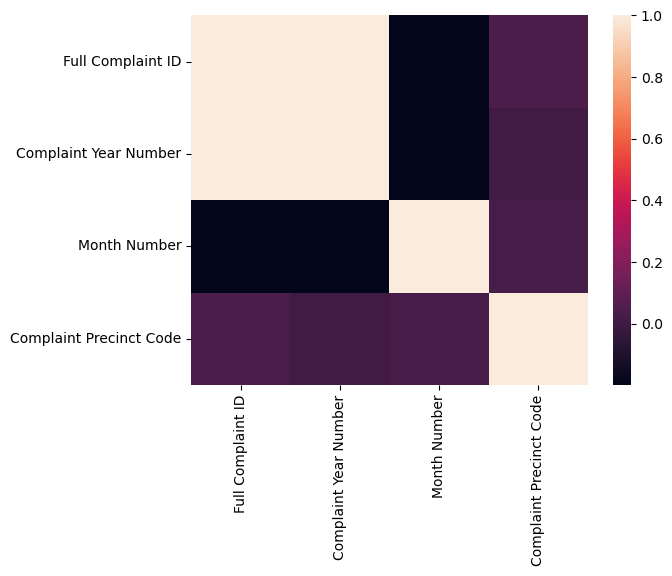

In [26]:
sb.heatmap(hate_crime.corr())

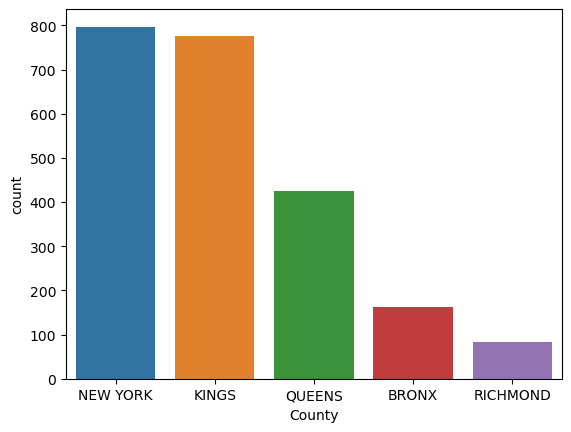

In [27]:
sb.countplot (x ='County', data=hate_crime,
              order = hate_crime.County.value_counts().index);

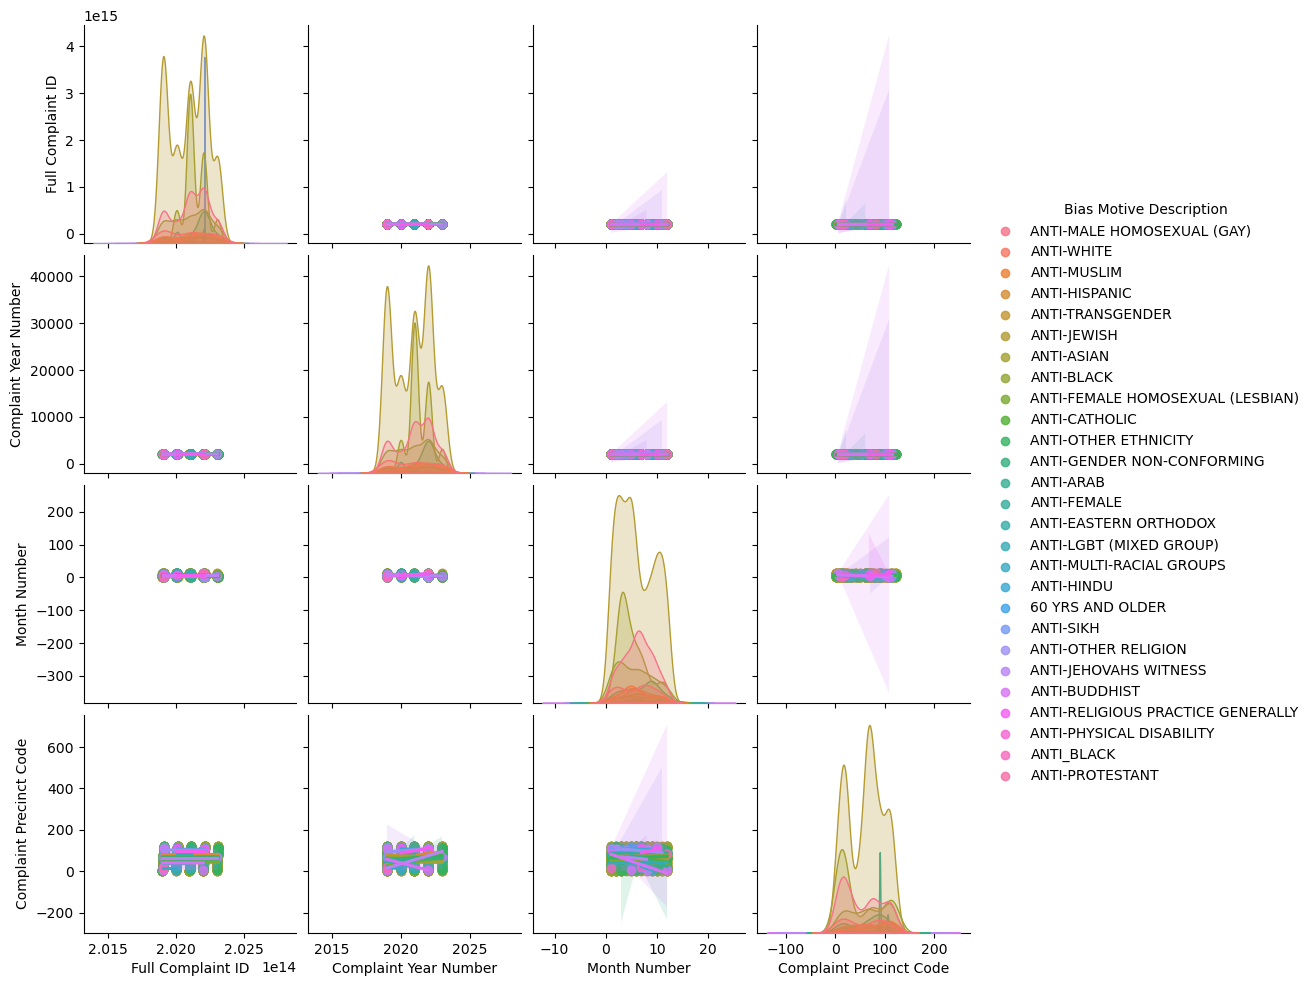

In [28]:
sb.pairplot(hate_crime, diag_kind='kde',kind ='reg', hue = 'Bias Motive Description');

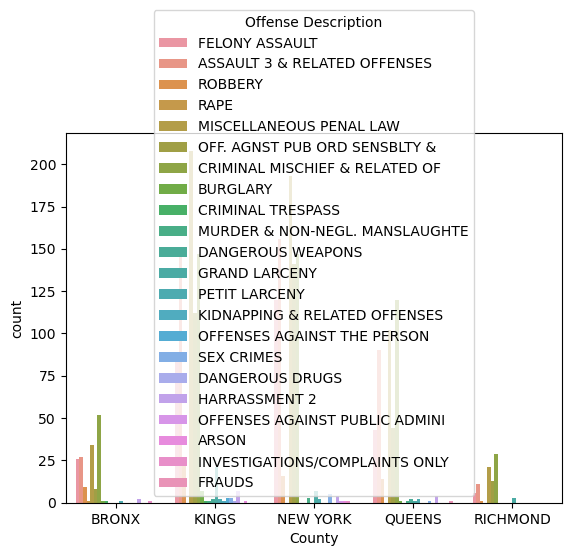

In [29]:
sb.countplot(x='County', data=hate_crime, hue='Offense Description');




# Conclusion and Recomendation

  

After analyzing the data on hate crimes in New York City from 2019 to 2023, some notable trends emerge. The years 2019 and 2022 saw the highest number of hate crime offenses, indicating spikes of intolerance and prejudice during those times. While 2023 is still ongoing, the lower offense numbers so far this year seem to suggest a positive downward shift in hate crimes. However, more data will be needed at the end of 2023 to confirm if this promising trend continues. 

One of the most frequently targeted groups for hate crimes was the Jewish community, highlighting the persistence of antisemitism in the city. Additionally, the neighborhoods of New York City and Brooklyn contained the largest number of reported incidents. This geographic concentration of hate crimes calls for increased resources and measures in these areas.

To further combat these concerning trends, law enforcement and government officials can take several actions. Hate crimes often stem from ignorance and misunderstanding, so promoting education and dialogues between groups may help. However, officials must also enact concrete policies to directly address crimes. Having more police patrols and surveillance in high-risk areas could act as a deterrent. Getting unstable and prejudiced individuals off the streets through appropriate channels may also reduce their ability to commit offenses. Finally, providing accessible mental health resources, job training programs, youth outreach, and community spaces could engage those vulnerable to radicalization in more positive directions.  

Ultimately, all New York City residents deserve to feel safe and protected wherever they live and go. The city must continue working to uproot the sources of hate and ensure people of all identities can walk the streets without fear of discrimination or violence. With coordinated efforts between law enforcement, government agencies, and community organizations, the promising declines in hate crimes can hopefully continue year after year.


## Challenges

1. Inconsistent data formatt
2. Incorrect data type
3. Null value
